# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
%matplotlib notebook

<class 'pandas.core.series.Series'>


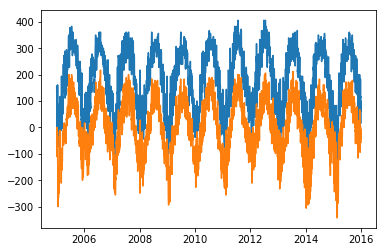

In [3]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def get_panda_df(binsize, hashid):
    df = pd.read_csv(f'data/C2A2_data/BinnedCsvs_d{binsize}/{hashid}.csv')
    return df
    
    

df = get_panda_df(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')
# Debugging and data exploration
# df.head()
df = df.sort_values(by=['Date'], ascending = True)
#print('Full data sample:')
#print(df.head())
dates = df['Date'].drop_duplicates()
print(type(dates))
max_temp_df = df.loc[df['Element'] == 'TMAX', ['Date', 'Data_Value']].sort_values(by=['Date'], ascending = True)
#print('Sample of max data')
#print(max_temp_df.head())

min_temp_df = df.loc[df['Element'] == 'TMIN', ['Date', 'Data_Value']].sort_values(by=['Date'], ascending = True)
#print('Sample of min data')
#print(min_temp_df.head())


# At this point each of the data frames has multiple values for each date
# I hypothesize that this is because of multiple observations within the same day, perhaps per hour or something.
# The solution is to choose the max and the min aggregate grouped by the date 
# so that we're picking the real max and min for each date

max_temp_df_cleaned = max_temp_df.groupby('Date').aggregate('max')
min_temp_df_cleaned = min_temp_df.groupby('Date').aggregate('min')

#print('Sample of max data after cleanup')
#print(max_temp_df_cleaned.head())
#print('max data shape:' )
#print(max_temp_df_cleaned.shape)
#print('Sample of min data after cleanup')
#print(min_temp_df_cleaned.head())

#print(min_temp_df_cleaned.shape)
#print('Dates shape:')
#print(dates.shape)

#print(dates.head())

dates_x = dates.apply(pd.to_datetime)

#type(dates_x)
max_temp_df_cleaned = max_temp_df_cleaned['Data_Value']
min_temp_df_cleaned = min_temp_df_cleaned['Data_Value']

#print(dates[0:10])

dates_as_list = list(map(pd.to_datetime, dates))
#type(dates_as_list)
#print(dates_as_list[0:10])
#plt.plot( min_temp_df_cleaned)


# show graph
plt.figure(figsize=(8,8))
plt.plot(dates_as_list, max_temp_df_cleaned)
plt.plot(dates_as_list, min_temp_df_cleaned)


plt.show()

plt.gca().fill_between(dates_as_list, 
                       max_temp_df_cleaned, min_temp_df_cleaned, 
                       facecolor='red', 
                       alpha=0.2)


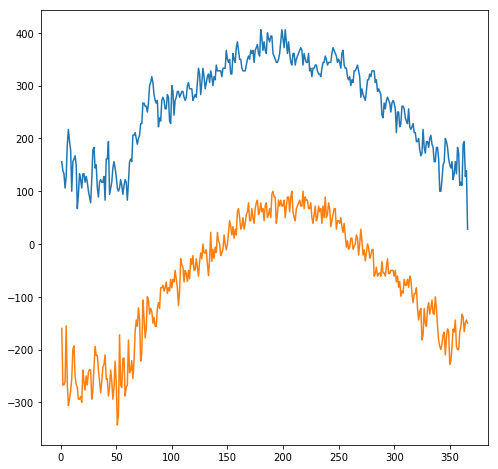

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def get_panda_df(binsize, hashid):
    df = pd.read_csv(f'data/C2A2_data/BinnedCsvs_d{binsize}/{hashid}.csv')
    return df
    
    

df = get_panda_df(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')
#Debugging and data exploration
#set the type of Date column to be Date

df = df.sort_values(by=['Date'], ascending = True)
#df.head()
#set the type of Date column to be dttype datetime64
df['Date']= pd.to_datetime(df['Date'])
#Debugging
#print(df.info())
#print(df.shape)
# Filter out data set from 2005 to 2014
df_0514 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]
#print(df_0514.info())
#print(df_0514.shape)

#Filter out the dataset for 2015
df_15 = df[df['Date'].dt.year == 2015]
#print(df_15.info())
#print(df_15.shape)

df_no_leap = df[(df['Date'].dt.day != 29)  | (df['Date'].dt.month != 2)]

#df_no_leap['Day_of_year'] = df_no_leap.apply (lambda row: row['Date'].dayofyear, axis=1)

day_of_year_df = df_no_leap.apply (lambda row: row['Date'].dayofyear, axis=1)
df_no_leap = df_no_leap.assign(date_of_year = day_of_year_df)

#print(day_of_year_df.shape)

#print(day_of_year_df.info())

max_temp_df = df_no_leap.loc[df['Element'] == 'TMAX', ['date_of_year', 'Data_Value']].sort_values(by=['date_of_year'], ascending = True)
#print('Sample of max data')
#print(max_temp_df.head())

min_temp_df = df_no_leap.loc[df['Element'] == 'TMIN', ['date_of_year', 'Data_Value']].sort_values(by=['date_of_year'], ascending = True)
#print('Sample of min data')
#print(min_temp_df.head())


max_temp_df_cleaned = max_temp_df.groupby('date_of_year').aggregate('max')
min_temp_df_cleaned = min_temp_df.groupby('date_of_year').aggregate('min')



x_values = np.arange(start=1, stop=367, step=1)

plt.figure(figsize=(8,8))
plt.plot(x_values, max_temp_df_cleaned)
plt.plot(x_values, min_temp_df_cleaned)

plt.show()

plt.gca().fill_between( x_values, 
                       max_temp_df_cleaned['Data_Value'],
                       min_temp_df_cleaned['Data_Value'], 
                       facecolor='gray', 
                       alpha=0.9)



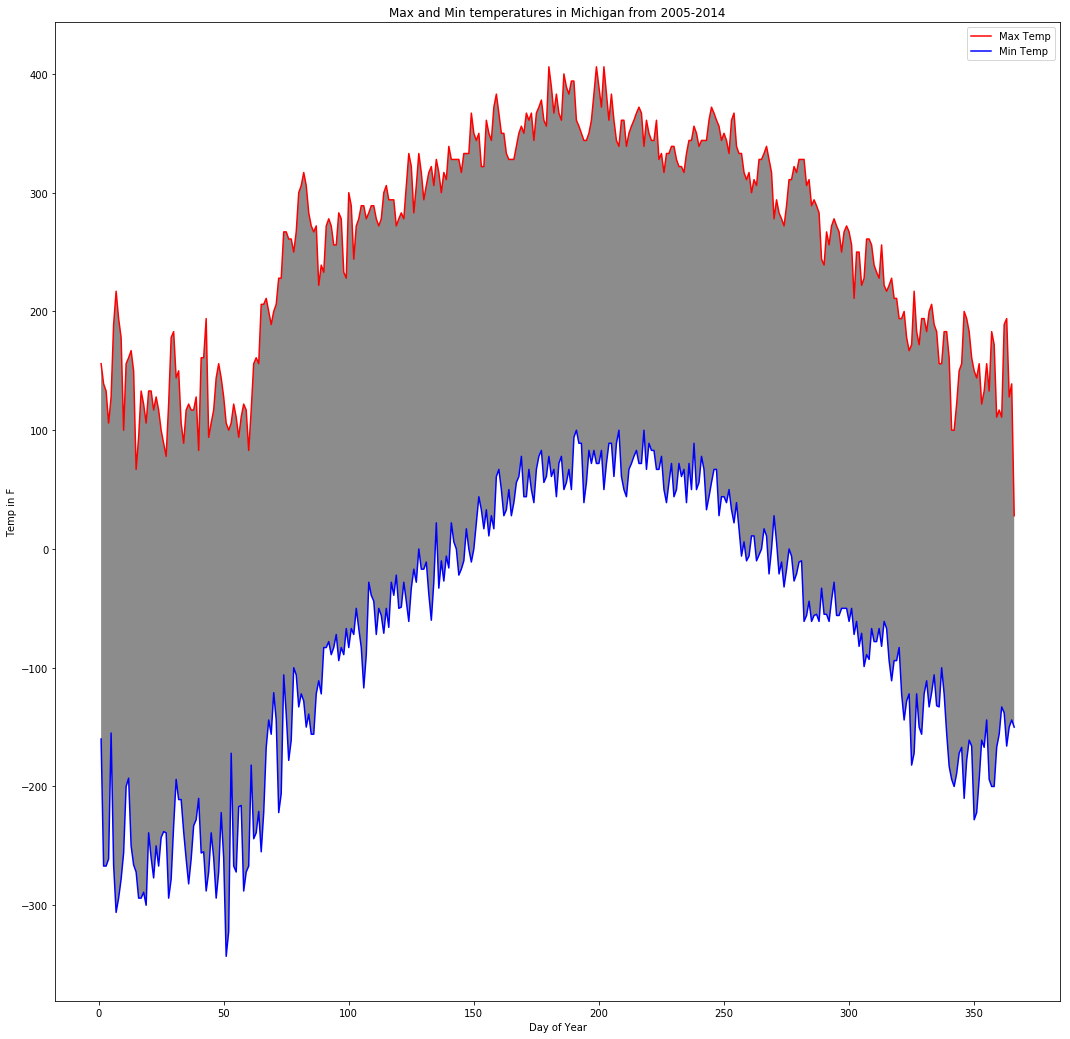

In [71]:

fig =plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
ax.set_title('Max and Min temperatures in Michigan from 2005-2014')

plt.plot(x_values, max_temp_df_cleaned, '-r', label='Max Temp')
plt.plot(x_values, min_temp_df_cleaned, '-b', label = 'Min Temp')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Temp in F')
ax.legend(loc='best')

plt.gca().fill_between( x_values, 
                       max_temp_df_cleaned['Data_Value'],
                       min_temp_df_cleaned['Data_Value'], 
                       facecolor='gray', 
                       alpha=0.9)


plt.show()

In [3]:
plt.gca().fill_between( x_values, 
                       max_temp_df_cleaned['Data_Value'],
                       min_temp_df_cleaned['Data_Value'], 
                       facecolor='gray', 
                       alpha=0.1)


In [25]:

df_no_leap = df[(df['Date'].dt.day != 29)  | (df['Date'].dt.month != 2)]

print(df_no_leap.info())

print(df_no_leap.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165002 entries, 60995 to 29410
Data columns (total 4 columns):
ID            165002 non-null object
Date          165002 non-null datetime64[ns]
Element       165002 non-null object
Data_Value    165002 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.3+ MB
None
(165002, 4)


In [26]:
df_test['DatePart'] = df['Date'].dt.day
df_leap = df_test[(df['Date'].dt.day == 29) & (df['Date'].dt.month == 2)]


print(df_leap.info())
print(df_leap.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 135281 to 20331
Data columns (total 5 columns):
ID            83 non-null object
Date          83 non-null datetime64[ns]
Element       83 non-null object
Data_Value    83 non-null int64
DatePart      83 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.9+ KB
None
                 ID       Date Element  Data_Value  DatePart
135281  USC00205451 2008-02-29    TMAX         -33        29
133079  USC00200032 2008-02-29    TMAX          17        29
123556  USC00205822 2008-02-29    TMAX         -22        29
133727  USC00207308 2008-02-29    TMAX         -22        29
154086  USC00208972 2008-02-29    TMIN        -128        29


In [44]:
print(df_no_leap.loc[60994]['Date'].dayofyear)

2005-01-01 00:00:00


In [46]:
#df_no_leap['Day_of_year'] = df_no_leap['Date'].dt.dayofyear



(165002,)


AttributeError: 'Series' object has no attribute 'info'

In [52]:
df_no_leap.tail()

,ID,Date,Element,Data_Value,Day_of_year,date_of_year
45691,USC00200032,2015-12-31,TMAX,11,365,365
10573,USC00205050,2015-12-31,TMIN,-17,365,365
21088,USC00208202,2015-12-31,TMAX,0,365,365
10253,USC00201250,2015-12-31,TMIN,-6,365,365
29410,USC00200230,2015-12-31,TMIN,-17,365,365


In [53]:
max_temp_df = df_no_leap.loc[df['Element'] == 'TMAX', ['date_of_year', 'Data_Value']].sort_values(by=['date_of_year'], ascending = True)
#print('Sample of max data')
#print(max_temp_df.head())

min_temp_df = df_no_leap.loc[df['Element'] == 'TMIN', ['date_of_year', 'Data_Value']].sort_values(by=['date_of_year'], ascending = True)
#print('Sample of min data')
#print(min_temp_df.head())


# At this point each of the data frames has multiple values for each date
# I hypothesize that this is because of multiple observations within the same day, perhaps per hour or something.
# The solution is to choose the max and the min aggregate grouped by the date 
# so that we're picking the real max and min for each date

max_temp_df_cleaned = max_temp_df.groupby('date_of_year').aggregate('max')
min_temp_df_cleaned = min_temp_df.groupby('date_of_year').aggregate('min')




In [54]:
print(max_temp_df_cleaned.head())
print(max_temp_df_cleaned.tail())

print(min_temp_df_cleaned.head())
print(min_temp_df_cleaned.tail())


              Data_Value
date_of_year            
1                    156
2                    139
3                    133
4                    106
5                    128
              Data_Value
date_of_year            
362                  189
363                  194
364                  128
365                  139
366                   28
              Data_Value
date_of_year            
1                   -160
2                   -267
3                   -267
4                   -261
5                   -155
              Data_Value
date_of_year            
362                 -138
363                 -166
364                 -150
365                 -144
366                 -150


In [81]:
print(type(x_values))
print(x_values.shape)
print(max_temp_df_cleaned.shape)
print(min_temp_df_cleaned.shape)

print(max_temp_df_cleaned.info())
print(min_temp_df_cleaned.info())


print(type(max_temp_df_cleaned))
print(type(max_temp_df_cleaned))

<class 'numpy.ndarray'>
(366,)
(366, 1)
(366, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1 to 366
Data columns (total 1 columns):
Data_Value    366 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1 to 366
Data columns (total 1 columns):
Data_Value    366 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB
None
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


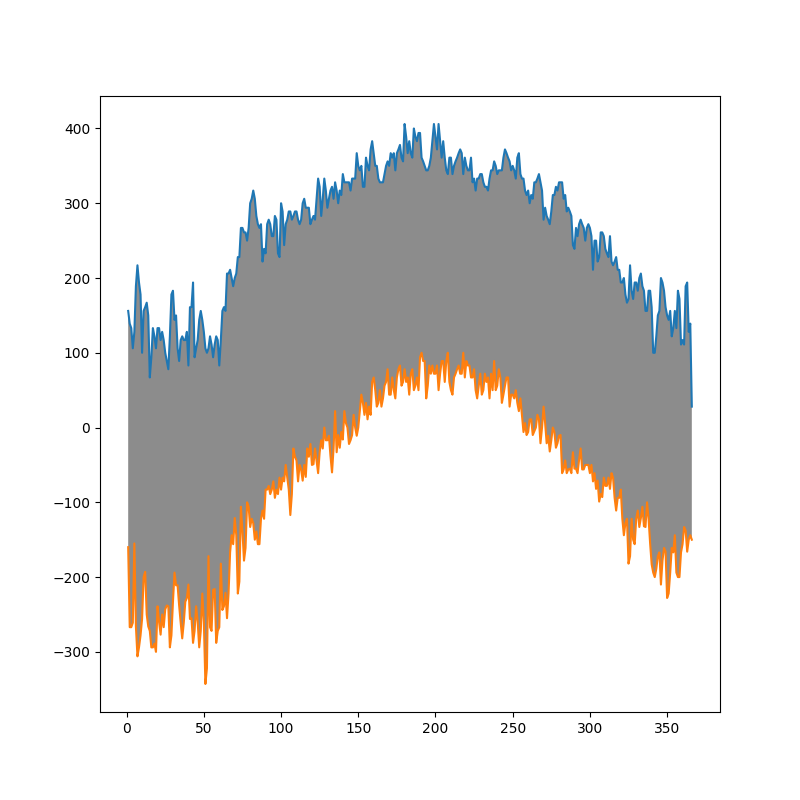

In [86]:

plt.figure(figsize=(8,8))
plt.plot(x_values, max_temp_df_cleaned)
plt.plot(x_values, min_temp_df_cleaned)
plt.gca().fill_between( x_values, 
                       max_temp_df_cleaned['Data_Value'],
                       min_temp_df_cleaned['Data_Value'], 
                       facecolor='gray', 
                       alpha=0.9)


plt.show()



In [69]:
df_15.head(365)

,ID,Date,Element,Data_Value,day_of_year
43095,USW00014833,2015-01-01,TMIN,-88,1
51805,USC00208972,2015-01-01,TMAX,-67,1
43140,USC00202308,2015-01-01,TMIN,-106,1
43653,USC00200228,2015-01-01,TMAX,-50,1
43652,USC00200228,2015-01-01,TMIN,-89,1
51804,USC00208972,2015-01-01,TMIN,-106,1
43141,USC00202308,2015-01-01,TMAX,-50,1
43383,USW00014853,2015-01-01,TMAX,11,1
43337,USW00014853,2015-01-01,TMIN,-71,1
43096,USW00014833,2015-01-01,TMAX,-21,1


In [55]:
day_of_year_df_15 = df_15.apply (lambda row: row['Date'].dayofyear, axis=1)
df_15 = df_15.assign(day_of_year = day_of_year_df)


max_temp_df_15 = df_15.loc[df_15['Element'] == 'TMAX', ['day_of_year', 'Data_Value']]\
                    .sort_values(by=['day_of_year'], ascending = True)
#print('Sample of max data')
#print(max_temp_df.head())

min_temp_df_15 = df_15.loc[df_15['Element'] == 'TMIN', ['day_of_year', 'Data_Value']]\
                    .sort_values(by=['day_of_year'], ascending = True)
#print('Sample of min data')
#print(min_temp_df.head())

max_temp_df_cleaned_15 = max_temp_df_15.groupby('day_of_year').aggregate('max')
min_temp_df_cleaned_15 = min_temp_df_15.groupby('day_of_year').aggregate('min')

max_temp_df_cleaned_15.rename(columns = {'Data_Value': 'data_value_15'}, inplace= True)

min_temp_df_cleaned_15.rename(columns = {'Data_Value': 'data_value_15'}, inplace = True)

max_temp_15 = pd.concat([max_temp_df_cleaned, max_temp_df_cleaned_15], axis = 1)
min_temp_15 = pd.concat([min_temp_df_cleaned, min_temp_df_cleaned_15], axis = 1)

print(max_temp_15)
print(min_temp_15)
          

TypeError: merge() got an unexpected keyword argument 'axis'

In [59]:
day_of_year_df_temp = pd.DataFrame(x_values, columns = 'day_of_year')
max_temp_15 = pd.concat([day_of_year_df_temp, max_temp_df_cleaned, max_temp_df_cleaned_15], axis = 1)
min_temp_15 = pd.concat([day_of_year_df_temp, min_temp_df_cleaned, min_temp_df_cleaned_15], axis = 1)

print(max_temp_15)
print(min_temp_15)


TypeError: Index(...) must be called with a collection of some kind, 'day_of_year' was passed

In [54]:


print('*** Max data ***')
print(max_temp_df_cleaned_15.info())
print('*** Min data ***')

print(min_temp_df_cleaned_15.info())

*** Max data ***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 1 columns):
data_value_15    365 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB
None
*** Min data ***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 1 columns):
data_value_15    365 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB
None


In [34]:
# Here im testing to see how to merge data from the 2 series, the 10 year data from 2005-2014
# and from 2015 and get the 

historic_data = {
    'day_of_year_hist': [1, 2, 3, 4, 5, 6, 7],
    'Data_value_hist' : [56, 72, 10, 20, 15, 45, 13]
}
historic_df = pd.DataFrame(data = historic_data)
new_data = {
    'day_of_year': [1, 2, 3, 4, 5, 6, 7],
    'Data_value_new': [58, 60, 12, 10, 13, 50, 15]
}


new_df = pd.DataFrame(data= new_data)

#print('Historic dataframe:')
#print(historic_df)

#print('New data:')
#print(new_df)

concat_df = pd.concat([historic_df,
                      new_df], 
                    axis=1
                     )
print('Concated data:')
print(concat_df)


max_only_data = concat_df[(concat_df['Data_value_new'] > concat_df['Data_value_hist'])]
print(max_only_data)

max_only_data = max_only_data[['Data_value_new','day_of_year']]

print(max_only_data)


Concated data:
   Data_value_hist  day_of_year_hist  Data_value_new  day_of_year
0               56                 1              58            1
1               72                 2              60            2
2               10                 3              12            3
3               20                 4              10            4
4               15                 5              13            5
5               45                 6              50            6
6               13                 7              15            7
   Data_value_hist  day_of_year_hist  Data_value_new  day_of_year
0               56                 1              58            1
2               10                 3              12            3
5               45                 6              50            6
6               13                 7              15            7
   Data_value_new  day_of_year
0              58            1
2              12            3
5              50            6
6  

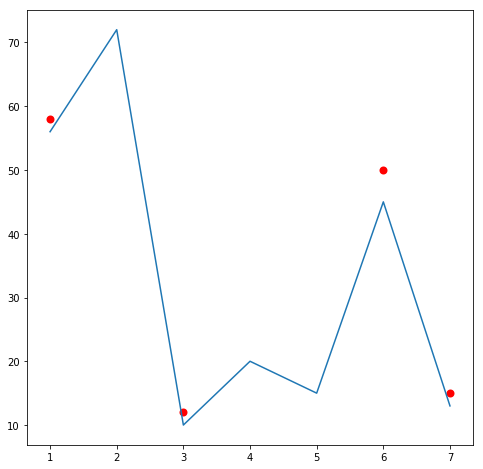

In [37]:
plt.figure(figsize =(8, 8))
plt.plot(historic_df['day_of_year_hist'], historic_df['Data_value_hist'])
plt.scatter(max_only_data['day_of_year'], max_only_data['Data_value_new'], c='r', marker='o',linewidths=2)
plt.show()




<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 2 columns):
day_of_year      366 non-null int64
data_value_15    365 non-null float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 2 columns):
day_of_year      366 non-null int64
data_value_15    365 non-null float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
None


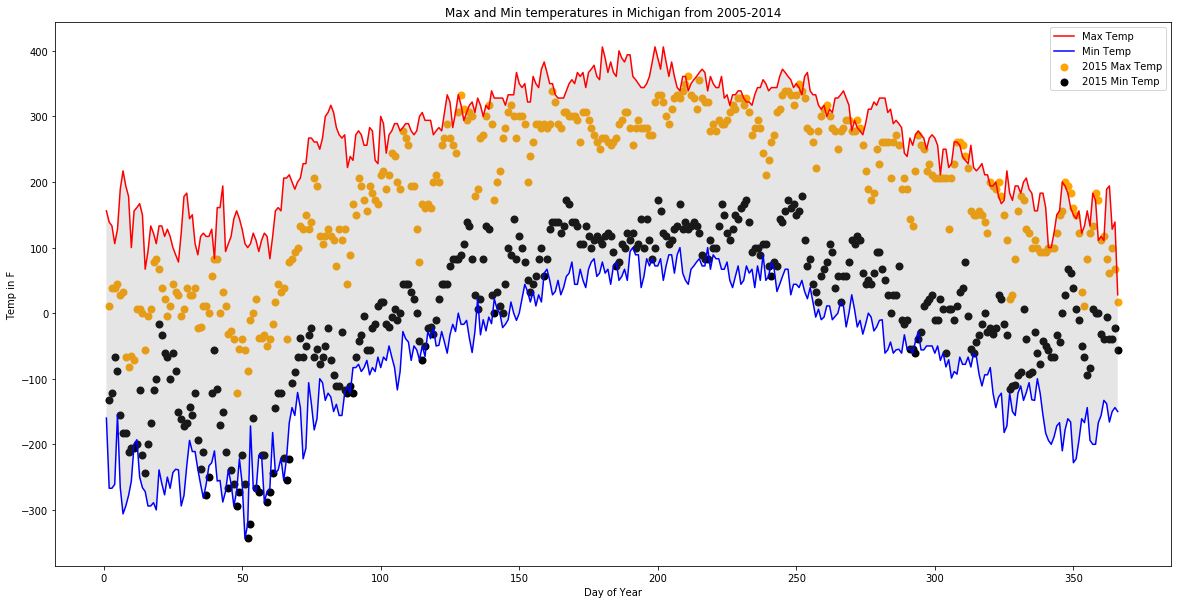

In [79]:

print(type(x_values))
day_of_year_df_temp = pd.DataFrame(data=x_values, columns = ['day_of_year'])
max_temp_15 = pd.concat([day_of_year_df_temp, max_temp_df_cleaned_15], axis = 1)
min_temp_15 = pd.concat([day_of_year_df_temp, min_temp_df_cleaned_15], axis = 1)
print(max_temp_15.info())
print(min_temp_15.info())

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_title('Max and Min temperatures in Michigan from 2005-2014')

plt.plot(x_values, max_temp_df_cleaned, '-r', label='Max Temp')
plt.plot(x_values, min_temp_df_cleaned, '-b', label = 'Min Temp')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Temp in F')


plt.scatter(max_temp_15['day_of_year'], max_temp_15['data_value_15'], c='orange', marker='o',linewidths=2, label='2015 Max Temp')
plt.scatter(min_temp_15['day_of_year'], min_temp_15['data_value_15'], c='black', marker='o',linewidths=2, label='2015 Min Temp')

ax.legend(loc='best')

plt.gca().fill_between( x_values, 
                       max_temp_df_cleaned['Data_Value'],
                       min_temp_df_cleaned['Data_Value'], 
                       facecolor='gray', 
                       alpha=0.2)


plt.show()


